<a href="https://colab.research.google.com/github/kangand/1000ml/blob/master/Assignment_7/CNN_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing the fastai models with the highest accuracy scores with the larger, data augmented dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'
plt.rcParams['figure.edgecolor']='w'

In [3]:
import os

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [5]:
import torch

from fastai.vision import get_transforms
from fastai.vision.data import ImageList, ImageDataBunch
from fastai.vision import defaults
from fastai.metrics import error_rate, accuracy
from fastai.vision.learner import create_cnn, cnn_learner
from fastai.vision.models import squeezenet1_0 # best model from initial testing
from fastai.widgets import *

In [6]:
tfms = get_transforms(do_flip=True, 
                      max_rotate=25)

path = '/content/Drive/My Drive/jewelery_images'

In [6]:
'''data = (ImageList.from_folder(path)
  .split_by_rand_pct()
  .label_from_folder()
  .transform(tfms, size=224)
  .databunch())'''

In [7]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224, train='train', valid='valid', test='test')

In [8]:
data.batch_size = 128

In [9]:
data

ImageDataBunch;

Train: LabelList (1006 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
earrings,earrings,earrings,earrings,earrings
Path: /content/Drive/My Drive/jewelery_images;

Valid: LabelList (267 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
ring,ring,ring,ring,ring
Path: /content/Drive/My Drive/jewelery_images;

Test: LabelList (254 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/Drive/My Drive/jewelery_images

In [10]:
defaults.device = torch.device('cuda')

In [12]:
learn = create_cnn(data, squeezenet1_0, metrics=accuracy)

learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.932846,1.639835,0.539326,01:34
1,1.391282,0.919324,0.779026,01:32
2,1.089823,0.574772,0.835206,01:30
3,0.880738,0.442423,0.853933,01:30
4,0.730232,0.465814,0.876405,01:29
5,0.622083,0.512906,0.861423,01:31
6,0.539695,0.466961,0.872659,01:29
7,0.479447,0.434308,0.883895,01:30
8,0.427459,0.419317,0.883895,01:29
9,0.386499,0.418027,0.887640,01:30


In [13]:
interp = ClassificationInterpretation.from_learner(learn)

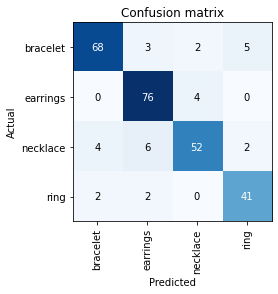

In [14]:
interp.plot_confusion_matrix()

In [17]:
interp.confusion_matrix()

array([[68,  3,  2,  5],
       [ 0, 76,  4,  0],
       [ 4,  6, 52,  2],
       [ 2,  2,  0, 41]])

In [18]:
interp.most_confused()

[('necklace', 'earrings', 6),
 ('bracelet', 'ring', 5),
 ('earrings', 'necklace', 4),
 ('necklace', 'bracelet', 4),
 ('bracelet', 'earrings', 3),
 ('bracelet', 'necklace', 2),
 ('necklace', 'ring', 2),
 ('ring', 'bracelet', 2),
 ('ring', 'earrings', 2)]